In [1]:
import numpy as np
from astropy.table import Table, join, MaskedColumn, vstack
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
from astropy.time import Time
import pandas as pd
import re
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
from math import e
from math import pi
from astropy.table import Column
from math import sqrt
import numpy as np
import emcee
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import math
import corner
from numpy import exp
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import nquad
import pdb


In [84]:
#Trying to generate randomn samples that fallow a power law distribution

x_min = 3
fake_alpha = -2
r = np.random.randn(800)
x_smp = x_min * (1 - r) ** (-1 / (fake_alpha - 1))

fake_M_l=[]
for i in range(800):
    if x_smp[i] >=3 and x_smp[i] <5:
        fake_M_l.append(x_smp[i])
fake_M_l.sort()
fake_M=np.array(fake_M_l) 
len(fake_M)

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


379

Text(0, 0.5, 'N Clusters')

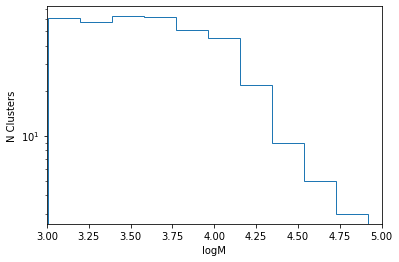

In [85]:
plt.hist(fake_M, histtype='step', bins=10)
plt.xlim(3,5)
plt.yscale('log')
plt.xlabel('logM')
plt.ylabel('N Clusters')

AP_data_table: ['APID', 'RegID', 'logAge-Best', 'logAge-P16', 'logAge-P84', 'logMass-Best', 'logMass-P16', 'logMass-P84']


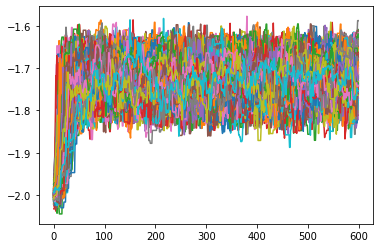

/Users/Tobin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


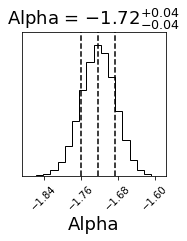

In [86]:
AP_data_table=Table.read("APData_csv.csv")
print("AP_data_table:", AP_data_table.colnames)

M=np.array(AP_data_table['logMass-Best'])
Tau= np.array(AP_data_table['logAge-Best'])
a_lim=5.0

def M_lim(Tau):
    for age in Tau:
        if 7.0 < age < 8.0 :
            return 740
        if 8.0 < age < np.log10(300000000) : 
            return 1080
        
def lnZ(theta, M):
    alpha = theta
    def f(M):
        return (M**alpha)
    ans, err = quad(f, 1080, np.inf)
    return np.log(ans)

def lnlike(theta, M):
    alpha = theta
    lin_M= 10**M
    return np.sum(alpha*np.log(lin_M)-lnZ(theta, lin_M))
    
def lnprior(theta):
    alpha = theta
    if -3 <= alpha <= -1 :
        return 0.0
    return -np.inf

def lnprob(theta, M):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, M)

starting_point=np.array([-2])

ndim, nwalkers = 1, 500
pos = [starting_point + 1e-2*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=([fake_M]))
sampler.run_mcmc(pos, 600)

#plot chain
plt.plot(np.transpose(sampler.chain[:,:,0]))
plt.show()
sampler.chain
samples = sampler.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["Alpha"], label_kwargs={"fontsize": 18},
                                     quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 18})

fig.show()
